In [1]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re
import matplotlib as mpl

In [2]:
mpl.rcParams.update({
    "font.sans-serif": ["Arial"],
    "font.cursive": ["Arial"],
    "font.family": "serif",
    "font.serif": ["Arial"],
    "font.size": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 14,
    "svg.fonttype": "none"
})

def ret_fig_ax(rows=1, cols=1):
    fig_width_pt = 448.13095  # Replace with your document's text width
    inches_per_pt = 1 / 72.27
    fig_width_in = fig_width_pt * inches_per_pt
    fig, ax = plt.subplots(rows,cols, figsize=( fig_width_in*2, fig_width_in )) 
    return fig, ax

#mpl.rcParams['text.usetex'] = False     

In [3]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dt1/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)
datadir_list

['/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_750.0_600.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_1000.0_600.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_650.0_550.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_650.0_612.5/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_750.0_587.5/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_850.0_612.5/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_650.0_562.5/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_850.0_600.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt1/iterative_canal_750.0_550.0/data',


In [4]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dt2/"
#print(path)

datadir_list2 = get_data_directories(path)

In [5]:
datadir_list2

['/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.00_522.9/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.26_522.9/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.30_657.1/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.26_657.1/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.60_657.1/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.04_657.1/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.56_657.1/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.13_657.1/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/compare_plots/dt2/parametric2_canal_0.09_657.1

In [69]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'
import time

def get_arr(pt, pt2, file,radii_list, press_list):
    # First pass: collect unique radii and pressure values
    for i in datadir_list2:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list

    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)
    
    for i in datadir_list2:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()
        
        u = np.loadtxt(i+file).astype(np.float64)
        u = np.max( u )
        
        #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
        r_index, p_index = np.where(radii == float(extracted))[0], np.where(press == float(extracted2))[0]
        #print(r_index,p_index,np.max(u))
        arr[r_index, p_index] = u
        #arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]
    return arr, radii_list, press_list, radii, press



def plot_pres(pt, pt2, file, title,ax, yl='Velocity', legend=True):
    #fig, ax = plt.subplots()
    #ax.set_title(title)
    radii_list, press_list = [], []
    arr, radii_list, press_list, radii, press = get_arr(pt, pt2, file,radii_list, press_list)

    # neg = ax.contour(arr)
    #neg = ax[0].imshow(arr)
    neg = ax[0].plot(arr, label=press)
    #ax.contour(arr, colors='red')

    ax[0].set_xticks(np.arange(0, len(radii), 2))
    ax[0].set_xticklabels([f'{radii[i]:.2f}' for i in range(0, len(radii), 2)])
    #y_ticks = np.arange(0, len(radii), 2) 
    #ax[0].set_yticks(y_ticks)
    #ax[0].set_yticklabels(radii[y_ticks])

    if legend:        
        ax[0].set_ylabel(r'Velocity $\bar{U}$ [U]')
        #ax[0].set_ylabel(r'Pressure $\bar{p}$ [$\frac{\mu U}{H}$]')#, fontsize=14)
        ax[0].set_xlabel(r'Obstacle r [H]')#, fontsize=14)
    ax[0].legend(loc="center right", frameon=False)
    #ax.set_title("Massflowrates L=10,dp=20-2300")
    return neg, ax[0], arr, radii, press 

#fig, ax = ret_fig_ax(1,2)
#ax[0], arr,radii, press  = plot_pres(pat, pat2, "/p_at_5_0.60/p_at_5.txt", "Pressure",ax, yl='P delta', legend=True)
#fig.savefig("comp_press_1.pdf", format='pdf', dpi=300, bbox_inches='tight')
#fig, ax2  = ret_fig_ax()
#ax, arr, radii, press  = plot_pres(pat, pat2, "/p_at_5_0.60/p_at_5.txt", "Pressure",ax2, yl='P delta', legend=False)
#fig.savefig("pressure_6.pdf", format='pdf', dpi=300, bbox_inches='tight')

In [70]:
#fig, ax = None, None
#arr

In [71]:
from dtoolcore import DataSet
import json
from dx_utils import zetta
import itertools
from itertools import permutations
import matplotlib as mpl

def get_height_from_dtool(dataset_uri):
    ## Dataset-level metadata
    dataset = DataSet.from_uri(dataset_uri)
    
    # Load the dataset
    dataset = DataSet.from_uri(dataset_uri)
    
    # Get the 'metadata' annotation
    metadata = dataset.get_annotation("metadata")
    
    # Print the metadata
    res = metadata[0]
    if res["p0"] ==0:
        return 1, np.ones(500)
    y = zetta(res["p0"], res["pl"], res["pg"],2,1000, num=500)
    
    return np.min(y), y

def find_matching_files(directory, pattern):
    regex = re.compile(pattern)
    matching_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if regex.search(os.path.join(root, file)):
                matching_files.append(os.path.join(root, file))
    return matching_files

def detect_segments(data, threshold):
    differences = np.abs(np.diff(data))
    discontinuities = np.where(differences > threshold)[0]
    segments = np.split(data, discontinuities + 1)
    return segments

def find_best_order(segments):
    n = len(segments)
    best_order = list(range(n))
    best_score = float('inf')
    
    for perm in itertools.permutations(range(n)):
        reordered = np.concatenate([segments[i] for i in perm])
        score = np.sum(np.abs(np.diff(reordered)))
        if score < best_score:
            best_score = score
            best_order = perm
    
    return best_order

def correct_profile(data, threshold):
    segments = detect_segments(data, threshold)
    best_order = find_best_order(segments)
    corrected = np.concatenate([segments[i] for i in best_order])
    return corrected



In [72]:
def plot_press2(pt, pt2, file, title,ax, yl='Velocity',legend=True, filename="output.pdf"):
    #fig, ax = ret_fig_ax()
    pg = "740.0"    
    #pg_l = ["_0.0","_700.0","_1000.0"]
    psd = ["550.0/","650.0/"]
    radii_list, press_list = [], []
    #if not (any(re.search(rf"{re.escape(pg_value)}(?=_|\b)", i) for pg_value in pg_l)):
    
    for i in datadir_list:
        if not (any(re.search(rf"{re.escape(psd_val)}", i) for psd_val in psd)):
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list


    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    # Create the arr with the correct dimensions
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)

    
    for i in datadir_list:
        #if not re.search(r'' + re.escape(pg) + r'\/data$', i):
        #    continue

        directory = os.path.dirname(i)
        file_pattern = os.path.basename(file)
        matching_files = find_matching_files(directory, file_pattern)
        
        h_max = get_height_from_dtool(re.sub(r'\/data$', r'', i))
        
        match, match2 = re.search(pt, i), re.search(pt2, i)
        print("match", i) if match is None else None
        print("match2", i) if match2 is None else None      
        extracted, extracted2 = float(match.group()), float(match2.group())
        file_path = matching_files[0]
        u = np.loadtxt(file_path)
        arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    #neg = ax[1].imshow(arr)
    neg = ax[1].plot(arr, label=press)
    ax[1].set_xticks(np.arange(len(radii)))
    #ax[1].set_yticks(np.arange(len(radii)))
    ax[1].set_xticklabels((radii).astype(int))
    #ax[1].set_yticklabels(radii)
    ax[1].legend(loc="center right", frameon=False)
    #plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

    #ax[1].set_ylabel(r'Pressure $\bar{p}$ [$\frac{\mu U}{H}$]')
    ax[1].set_ylabel(r'Velocity $\bar{U}$ [U]')
    ax[1].set_xlabel(r'$P_G$ [$\frac{\mu U}{H}$]')

    #plt.show()
    #fig.savefig("press_membrane.pdf", format='pdf', dpi=300, bbox_inches='tight')
    return neg, ax[1], radii, press, arr



[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [522.9 657.1] (15, 2)
[   0.  600.  650.  700.  750.  800.  850.  900.  950. 1000.] [550. 650.] (10, 2)
p0:  409.8016838671273  pg:  750  pl:  192.45747420151278
p0:  360.00854817364063  pg:  1000  pl:  240.00984857242025
p0:  367.95040442245295  pg:  650  pl:  183.73900395886483
p0:  406.6775072939906  pg:  650  pl:  207.8866636374811
p0:  401.94600978842385  pg:  750  pl:  187.77808517542658
p0:  429.6187165459982  pg:  850  pl:  185.40771609094799
p0:  375.92853487655555  pg:  650  pl:  188.54842533142158
p0:  421.60282162949744  pg:  850  pl:  180.86362817606383
p0:  378.1684877255189  pg:  750  pl:  173.84641638705062
p0:  388.69619700758307  pg:  700  pl:  188.31457939794606
p0:  397.34343937726453  pg:  850  pl:  167.38815125720978
p0:  367.50873829507697  pg:  1000  pl:  245.010056052002
p0:  399.2321778606473  pg:  650  pl:  202.99022549728943
p0:  423.5147647953647  pg:  800  pl:  191.47591269939244

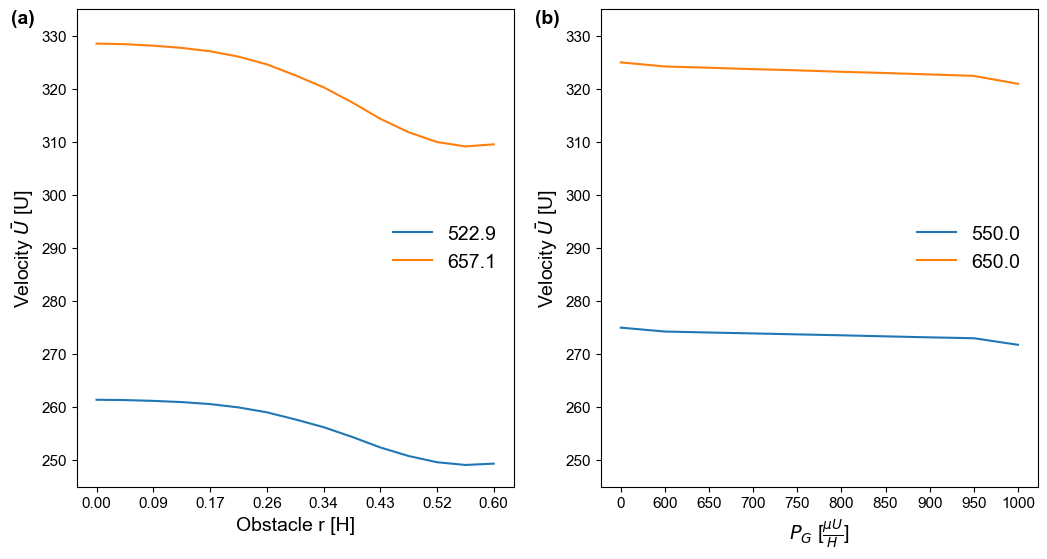

In [73]:
fig, ax = ret_fig_ax(1,2)
neg, ax[0], arr,radii, press  = plot_pres(pat, pat2, "/p_at_5_0.60/p_at_5.txt", "Pressure",ax, yl='P delta', legend=True)
ax[0].set_ylim(245,335)
ax[1].set_ylim(245,335)
#fig.colorbar(neg, ax=ax[0], location='right', anchor=(0, 0.3), shrink=0.7) # , label="pressure")

neg2, ax[1], radii2, press2, arr2 = plot_press2(pat, pat2, "/p_at_5_0.32/p_at_5.txt", r"Velocity at different $P_g$",ax, yl='P delta', legend=True)
#fig.colorbar(neg2, ax=ax[1], location='right', anchor=(0, 0.3), shrink=0.7, label="Pressure")
ax[0].text(-.15, 1.0, '(a)', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top')
ax[1].text(-.15, 1.0, '(b)', transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top')
#plt.tight_layout()
#fig.tight_layout() 
plt.show()
fig.savefig("pressure_comp.pdf", format='pdf', dpi=300, bbox_inches='tight')

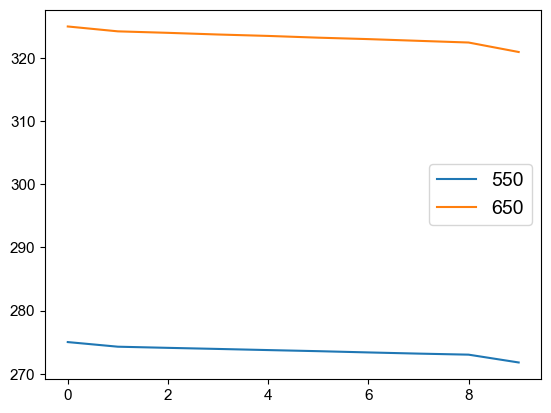

In [65]:
plt.plot(arr2, label=[550, 650])
plt.legend()

[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [522.9 657.1] (15, 2)
[   0.  600.  650.  700.  750.  800.  850.  900.  950. 1000.] [550. 650.] (10, 2)
p0:  409.8016838671273  pg:  750  pl:  192.45747420151278
p0:  360.00854817364063  pg:  1000  pl:  240.00984857242025
p0:  367.95040442245295  pg:  650  pl:  183.73900395886483
p0:  406.6775072939906  pg:  650  pl:  207.8866636374811
p0:  401.94600978842385  pg:  750  pl:  187.77808517542658
p0:  429.6187165459982  pg:  850  pl:  185.40771609094799
p0:  375.92853487655555  pg:  650  pl:  188.54842533142158
p0:  421.60282162949744  pg:  850  pl:  180.86362817606383
p0:  378.1684877255189  pg:  750  pl:  173.84641638705062
p0:  388.69619700758307  pg:  700  pl:  188.31457939794606
p0:  397.34343937726453  pg:  850  pl:  167.38815125720978
p0:  367.50873829507697  pg:  1000  pl:  245.010056052002
p0:  399.2321778606473  pg:  650  pl:  202.99022549728943
p0:  423.5147647953647  pg:  800  pl:  191.47591269939244

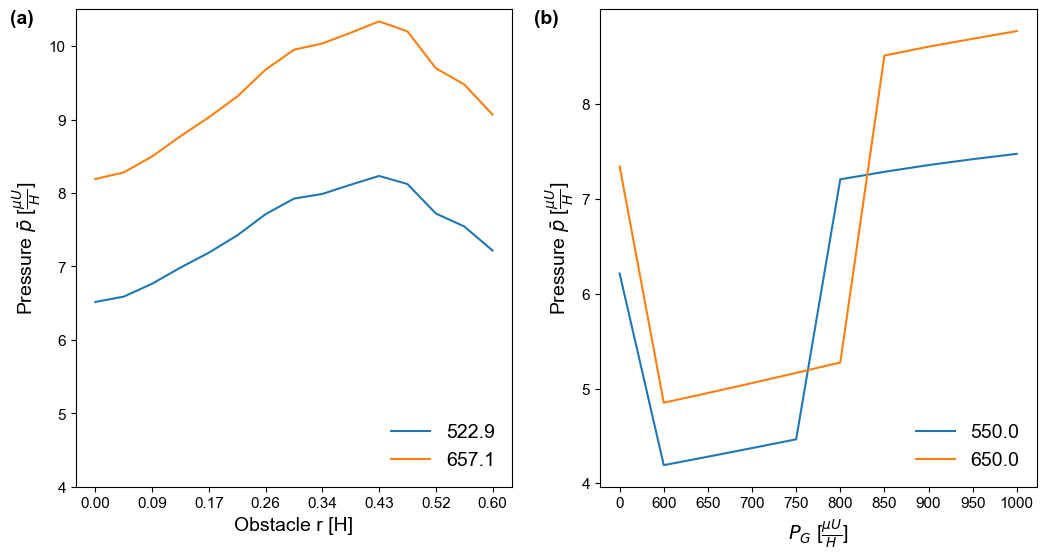

In [62]:
fig, ax = ret_fig_ax(1,2)
neg, ax[0], arr,radii, press  = plot_pres(pat, pat2, "/y_at_5_0.60/y_at_5.txt", "Pressure",ax, yl='P delta', legend=True)
#fig.colorbar(neg, ax=ax[0], location='right', anchor=(0, 0.3), shrink=0.7) # , label="pressure")
ax[0].set_ylim(4,10.5)
neg2, ax[1], radii2, press2, arr2 = plot_press2(pat, pat2, "/y_at_5_.*_0.32/y_at_5_.*.txt", r"Velocity at different $P_g$",ax, yl='P delta', legend=True)
#fig.colorbar(neg2, ax=ax[1], location='right', anchor=(0, 0.3), shrink=0.7, label="Velocity")
ax[0].text(-.15, 1.0, '(a)', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top')
ax[1].text(-.15, 1.0, '(b)', transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top')
#plt.tight_layout()
#fig.tight_layout() 
plt.show()
fig.savefig("velo_comp.pdf", format='pdf', dpi=300, bbox_inches='tight')

In [71]:
arr2

array([[275.00745559, 325.00886358],
       [274.27457338, 324.2371575 ],
       [274.09209664, 324.00152744],
       [273.91926909, 323.73693215],
       [273.739041  , 323.51232059],
       [273.56562746, 323.23546806],
       [273.36634044, 323.0065806 ],
       [273.17950779, 322.73520089],
       [273.01398509, 322.46707657],
       [271.77484771, 320.96436945]])

[Text(0, 0, '550'), Text(1, 0, '650')]

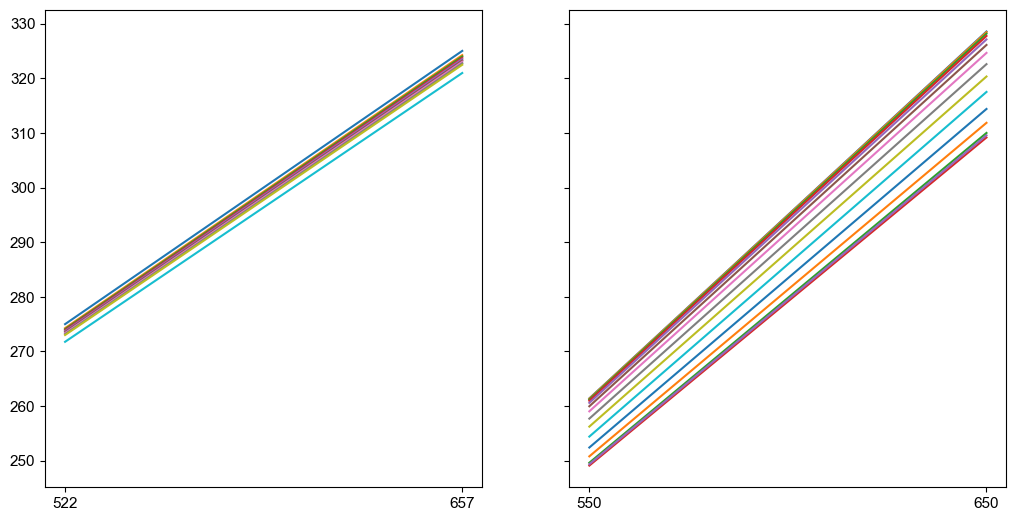

In [81]:
fig, ax = ret_fig_ax(1,2)

ax[0].plot(arr2.T)
ax[1].plot(arr.T)
ax[0].set_xticks(np.arange(len(press)))
ax[0].set_xticklabels((press).astype(int))
ax[1].set_xticks(np.arange(len(press2)))
ax[1].set_xticklabels((press2).astype(int))

[   0.  600.  650.  700.  750.  800.  850.  900.  950. 1000.] [550.  562.5 575.  587.5 600.  612.5 625.  637.5 650. ] (10, 9)


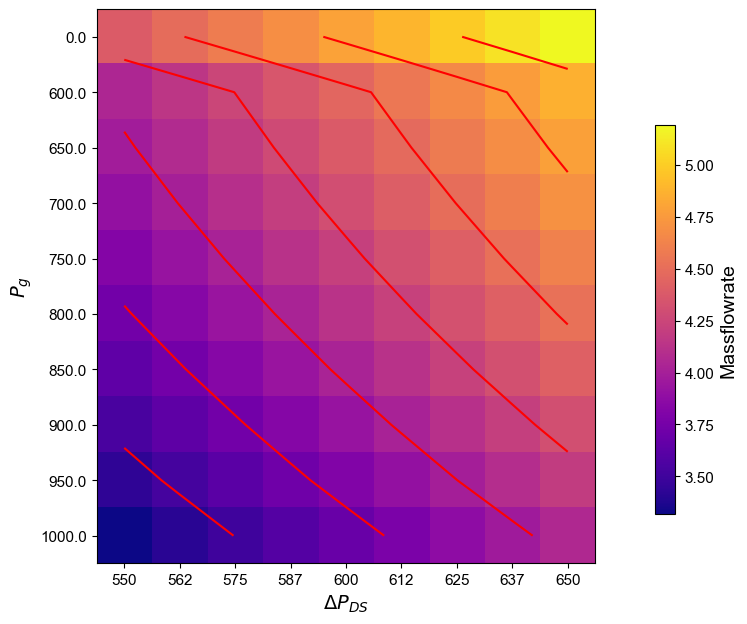

In [38]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'


def plot_press(pt, pt2, file, title, yl='Velocity', legend=True, filename="output.pdf"):
    fig, ax = ret_fig_ax()
    #ax.set_title(title)
    pg = "740.0"    

    radii_list, press_list = [], []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        #if not re.search(r'' + re.escape(pg) + r'\/data$', i):
        #    continue
        
        #print(i)
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list


    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    # Create the arr with the correct dimensions
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)

    
    for i in datadir_list:
        #if not re.search(r'' + re.escape(pg) + r'\/data$', i):
        #    continue

        #directory = os.path.dirname(i)
        #print(i)
        
        match, match2 = re.search(pt, i), re.search(pt2, i)
        print("match", i) if match is None else None
        print("match2", i) if match2 is None else None      
        extracted, extracted2 = float(match.group()), float(match2.group())
        u = np.loadtxt(i+file)
        arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

    #handles, labels = plt.gca().get_legend_handles_labels()
    #extracted_values = [float(re.search(r'\s*(\d+(?:\.\d+)?)', label).group(1)) for label in labels]

    # Create sorted pairs of (handle, label) based on extracted values
    #sorted_pairs = sorted(zip(handles, labels), key=lambda x: float(re.search(r'\s*(\d+(?:\.\d+)?)', x[1]).group(1)))
    
    #sorted_handles, sorted_labels = zip(*sorted_pairs)
    #plt.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.0, 1), loc='upper left',frameon=False)
    
    neg = ax.imshow(arr, cmap="plasma")
    ax.contour(arr, colors='red')
    #ax.contour(arr, colors='red')
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    plt.tight_layout()
    #plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Massflowrate")
    ax.set_ylabel(r'$P_g$', fontsize=14)
    ax.set_xlabel(r'$\Delta P_{DS}$', fontsize=14)

    plt.show()
    #fig.savefig("massflow_membrane.pdf", format='pdf', dpi=300, bbox_inches='tight')
    return radii, press, arr


radii, press, arr = plot_press(pat, pat2, "/flux_trapz_0.32/flux_trapz.txt", "Massflowrate", yl='P delta', legend=True)

[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [522.9 657.1] (15, 2)


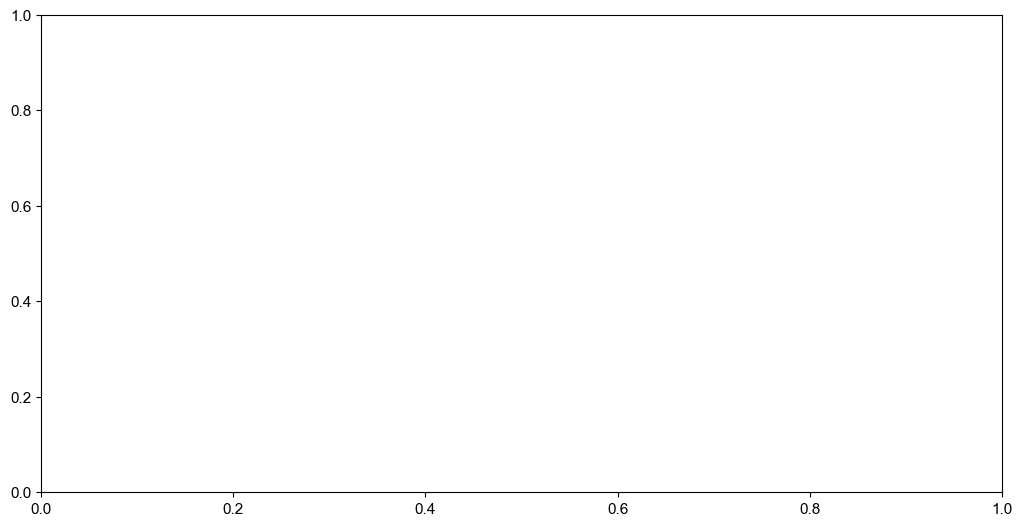

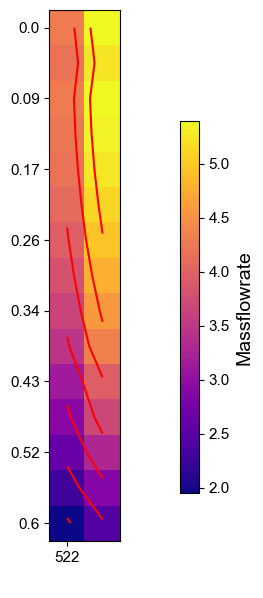

In [39]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title,ax, yl='Velocity', legend=True):
    #fig, ax = plt.subplots()
    #ax.set_title(title)

    radii_list, press_list = [], []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list2:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list

    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)
    
    for i in datadir_list2:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()

        u = np.loadtxt(i+file)
        u = np.mean(u[(u >= 0) & (u <= 100)])
        #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
        arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u*10


    # neg = ax.contour(arr)
    neg = ax.imshow(arr, cmap="plasma")
    ax.contour(arr, colors='red')

    x_ticks = np.arange(0, len(press), 3) 
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(press[x_ticks].astype(int))
    
    # For y-axis (radii)
    y_ticks = np.arange(0, len(radii), 2) 
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(radii[y_ticks])

    if not legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Massflowrate")
        ax.set_xlabel(r'    ')
    
    if legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
        ax.set_ylabel(r'Obstacle r')#, fontsize=14)
        ax.set_xlabel(r'$\Delta P_{SD}$')#, fontsize=14)

    #ax.set_title("Massflowrates L=10,dp=20-2300")
    plt.tight_layout()
    return ax,arr, radii, press 

fig, ax = ret_fig_ax()
#ax, arr, radii, press  = plot_mfl(pat, pat2, "/massflowrate_0.10/massflowrate.txt", "Massflowrate",ax, yl='P delta', legend=True)
#fig.savefig("flux_1.pdf", format='pdf', dpi=300, bbox_inches='tight')
fig, ax2  = ret_fig_ax()
ax2, arr2, radii2, press2  = plot_mfl(pat, pat2, "/massflowrate_0.50/massflowrate.txt", "Massflowrate",ax2, yl='P delta', legend=False)
#fig.savefig("flux_6.pdf", format='pdf', dpi=300, bbox_inches='tight')


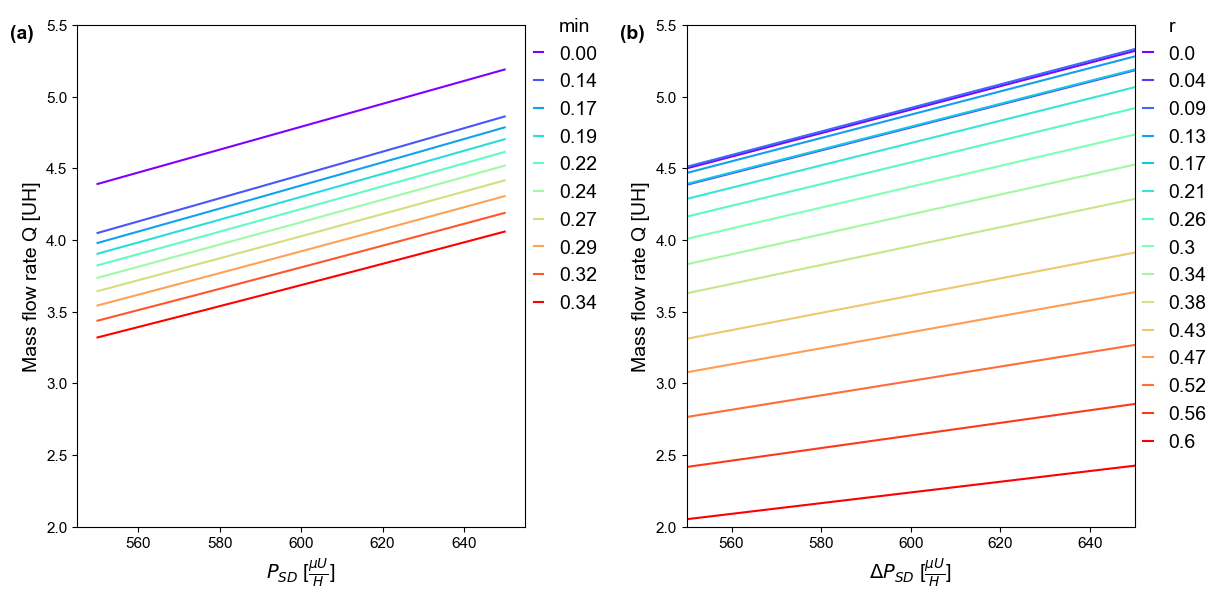

In [42]:
fig, ax = None, None
fig, ax = ret_fig_ax(1,2)
custom_line = plt.Line2D([0], [0],color='none', marker='', linestyle='', lw=2)
plt.subplots_adjust(wspace=.4)

max_h = [0.78,0.71,0.66,0.76,0.68,1,0.73,0.86,0.83,0.81]
max_h = np.abs(np.sort(max_h)[::-1]-1)

max_h_formatted = [f'{x:.2f}' for x in max_h]
lines = ax[0].plot(press, arr.T, label=max_h_formatted)
ax[0].set_ylabel("Mass flow rate Q [UH]")
ax[0].set_xlabel(r'$P_{SD}$ [$\frac{\mu U}{H}$]')
colors = plt.cm.rainbow(np.linspace(0, 1, max_h.size))
for line, color in zip(lines, colors):
    line.set_color(color)

ax[0].legend([custom_line] + ax[0].get_legend_handles_labels()[0],
           ['min'] + ax[0].get_legend_handles_labels()[1],
            frameon=False,bbox_to_anchor=(0.98, 1.05), loc='upper left',handlelength=.5)

colors1 = plt.cm.rainbow(np.linspace(0, 1, 15))

lines1 = ax[1].plot(press2, arr2.T, label=radii2)
ax[1].set_ylabel(r'Mass flow rate Q [UH]')#, fontsize=14)
ax[1].set_xlabel(r'$\Delta P_{SD}$ [$\frac{\mu U}{H}$]')#, fontsize=14)
ax[1].set_xlim(550,650)
ax[1].set_ylim(2,5.5)

for line1, color in zip(lines1, colors1):
    line1.set_color(color)
ax[1].legend([custom_line] + ax[1].get_legend_handles_labels()[0],
           ['r'] + ax[1].get_legend_handles_labels()[1],
           frameon=False, bbox_to_anchor=(0.98, 1.05), loc='upper left',handlelength=.5)

fig = plt.gcf()
ax[0].text(-0.15, 1., '(a)', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top')
ax[1].text(-0.15, 1., '(b)', transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top')
ax[0].set_ylim(2.,5.5)
plt.tight_layout()
fig.savefig("mfl_linear_55-65.pdf", format='pdf', dpi=300, bbox_inches='tight')